In [10]:
%matplotlib inline  
import glob,h5py,os,re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20
from utils.misc import readPickle, getConfigFile, loadHDF5
import sys
sys.path.append('../../medical_data/')
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from load import loadMedicalData
dset = 'A'
dataset = loadMedicalData(dset)
from medical import cleanLabels
print dataset.keys()
patient_dict =  cleanLabels(dataset['obs_dict'])
doctor_dict =  cleanLabels(dataset['act_dict'])

allfiles = {}
for f in glob.glob('../../expt-medical-fast/chkpt-A/*cfac.pkl'):
    params = readPickle(getConfigFile(f.replace('cfac.pkl','')))[0]
    code   = str(params['dim_stochastic'])+'-'+str(params['dim_hidden'])
    data   = loadHDF5(f.replace('cfac.pkl','EP1900-stats.h5'))
    minvalid=np.min(data['valid_bound'][:,1])
    print code, minvalid,' at epoch ',data['valid_bound'][np.argmin(data['valid_bound'][:,1]),0],data['valid_bound'][-1,1]
    
    allfiles[code] = f

code = '50-200'
results = readPickle(allfiles[code],nobjects = 3)
evaldict = results[0]
cfacdict = results[1]
sampleCfac = results[2]

['ind_dict', u'test_obs', u'train_obs', 'data_type', u'valid_ind', 'dim_observations', 'act_dict', u'valid_act', 'obs_dict', u'test_ind', 'dim_indicators', u'train_ind', u'test_act', 'test_mask', 'valid_mask', u'valid_obs', 'train_mask', 'dim_actions', 'mids', u'train_act']
Read  1  objects
30-100 68.9202699404  at epoch  1850.0 69.0157144907
Read  1  objects
50-100 68.8763250403  at epoch  1900.0 68.8763250403
Read  1  objects
30-200 68.869074641  at epoch  1450.0 69.1858157596
Read  1  objects
50-200 68.0979218354  at epoch  1425.0 69.4119295687
Read  3  objects


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
patient_data   = evaldict['x_s']
doctor_data    = evaldict['a_s']
patdict_data   = patient_dict
docdict_data   = doctor_dict

shufidx = np.random.permutation(patient_data.shape[0])
for ctr in range(5):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = patient_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,2,figsize=(8,10))
    #fig.suptitle('Patient: '+mids_data[idx])
    ax = axlist[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    ax = axlist[1]
    data = doctor_data[idx,:,:]
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

patdict_data   = patient_dict
docdict_data   = doctor_dict

shufidx = cfacdict.keys()
for ctr in range(5):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = cfacdict[idx]['x_nodrug'].squeeze()
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,2,figsize=(8,10))
    #fig.suptitle('Patient: '+mids_data[idx])
    ax = axlist[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    ax = axlist[1]
    data = cfacdict[idx]['a_nodrug'].squeeze()
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

patdict_data   = patient_dict
docdict_data   = doctor_dict

shufidx = np.arange(sampleCfac['x_nodrug'].shape[0])
for ctr in range(5):
    idx = shufidx[ctr]
    row_labels = patdict_data
    data = sampleCfac['x_drug'][idx]
    column_labels = range(1,data.shape[0]+1)
    fig, axlist = plt.subplots(1,2,figsize=(8,10))
    #fig.suptitle('Patient: '+mids_data[idx])
    ax = axlist[0]
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)

    ax = axlist[1]
    data = sampleCfac['a_drug'][idx]
    column_labels = range(1,data.shape[0]+1)
    row_labels = docdict_data
    heatmap = ax.pcolor(data.transpose(), cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_xaxis()
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()

    ax.tick_params(labelsize = 12)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    
    plt.show()

In [ ]:
print patient_dict

In [11]:
patient_cfac = {}

#For the sample based cfac, put into dict w/ this form
idx =0 
for idx in range(sampleCfac['x_drug'].shape[0]):
    patient_cfac[idx] = {}
    for k in sampleCfac:
        patient_cfac[idx][k] = sampleCfac[k][idx]

def normalize(mat, axis=1):
    return mat/mat.sum(axis=axis,keepdims=True)
def computeStatistics(patient_cfac, obs_dict, maxT = 18):
    """Compute statistics between two frames of patient data"""
    #Compare complications, A1c levels, Glucose levels
    compl_st = [idx for idx,k in enumerate(obs_dict) if 'Gout' in k][0]
    gluc_st  = [idx for idx,k in enumerate(obs_dict) if '92.0 $<$ Gluc.' in k][0]
    gluc_end = [idx for idx,k in enumerate(obs_dict) if 'Gluc. $<$ 98' in k][0]
    a1c_st   = [idx for idx,k in enumerate(obs_dict) if 'A1c $<$ 5.5' in k][0]
    a1c_end  = [idx for idx,k in enumerate(obs_dict) if 'A1c $<$ 19' in k][0]
    
    a1c_high   = [idx for idx,k in enumerate(obs_dict) if 'A1C high' in k][0]
    gluc_high  = [idx for idx,k in enumerate(obs_dict) if 'Gluc high' in k][0]
    print 'Index',compl_st,'Name', obs_dict[compl_st]
    print 'Index',gluc_st,'Name', obs_dict[gluc_st]
    print 'Index',gluc_end,'Name', obs_dict[gluc_end]
    print 'Index',a1c_st, 'Name',obs_dict[a1c_st]
    print 'Index',a1c_end, 'Name',obs_dict[a1c_end]
    print 'Index',a1c_high, 'Name',obs_dict[a1c_high]
    print 'Index',gluc_high, 'Name',obs_dict[gluc_high]
    #Thresholds for A1C/Glucose
    A1C_t  = 3
    Gluc_t = 3
    
    #Save result arrays
    comp_arrA = np.zeros((maxT,))
    a1c_arrA = np.zeros((maxT,))
    gluc_arrA = np.zeros((maxT,))
    results   = {}
    results['compl_drug']      = np.zeros((maxT,))
    results['compl_nodrug']    = np.zeros((maxT,))
    results['compl_drug_ctr']  = np.zeros((maxT,))
    results['compl_nodrug_ctr']= np.zeros((maxT,))
    
    results['gluc_drug']       = np.zeros((maxT,))
    results['gluc_nodrug']     = np.zeros((maxT,))
    results['gluc_drug_ctr']   = np.zeros((maxT,))
    results['gluc_nodrug_ctr'] = np.zeros((maxT,))
    
    results['gluc_drug_thres']       = np.zeros((maxT,))
    results['gluc_nodrug_thres']     = np.zeros((maxT,))
    results['gluc_drug_thres_ctr']   = np.zeros((maxT,))
    results['gluc_nodrug_thres_ctr'] = np.zeros((maxT,))
    
    results['gluc_drug_hl']        = np.zeros((maxT,))
    results['gluc_nodrug_hl']      = np.zeros((maxT,))
    results['gluc_drug_hl_ctr']    = np.zeros((maxT,))
    results['gluc_nodrug_hl_ctr']  = np.zeros((maxT,))
    
    results['a1c_drug']        = np.zeros((maxT,))
    results['a1c_nodrug']      = np.zeros((maxT,))
    results['a1c_drug_ctr']    = np.zeros((maxT,))
    results['a1c_nodrug_ctr']  = np.zeros((maxT,))
    
    results['a1c_drug_thres']        = np.zeros((maxT,))
    results['a1c_nodrug_thres']      = np.zeros((maxT,))
    results['a1c_drug_thres_ctr']    = np.zeros((maxT,))
    results['a1c_nodrug_thres_ctr']  = np.zeros((maxT,))
    
    results['a1c_drug_hl']        = np.zeros((maxT,))
    results['a1c_nodrug_hl']      = np.zeros((maxT,))
    results['a1c_drug_hl_ctr']    = np.zeros((maxT,))
    results['a1c_nodrug_hl_ctr']  = np.zeros((maxT,))
    
    def complication(frame, compl_st):
        return ((frame[:,compl_st:]>0.5)*1.).sum(1)
    def normalized_values(frame, val_st, val_end):
        return normalize(frame[:,val_st:val_end]).argmax(axis=1)
    def thresholded_values(frame, val_st, val_end, thres_idx):
        frame_subset = frame[:,val_st:val_end]
        drug_l       = frame_subset[:,:thres_idx].mean(1,keepdims=True)
        drug_h       = frame_subset[:,thres_idx:].mean(1,keepdims=True)
        drug_thres   = np.concatenate([drug_l,drug_h],axis=1).argmax(1)
        return drug_thres
    def high_low_values(frame, val_high):
        return (frame[:,val_high]>0.5)*1.
    
    for k in patient_cfac:
        frame_drug   = patient_cfac[k]['x_drug'].squeeze()
        frame_nodrug = patient_cfac[k]['x_nodrug'].squeeze()
        """Complications in population"""
        c_drug       = complication(frame_drug, compl_st)
        c_nodrug     = complication(frame_nodrug, compl_st)
        results['compl_drug'][:c_drug.shape[0]]          += c_drug
        results['compl_nodrug'][:c_nodrug.shape[0]]      += c_nodrug
        results['compl_drug_ctr'][:c_drug.shape[0]]      += np.ones_like(c_drug)
        results['compl_nodrug_ctr'][:c_nodrug.shape[0]]  += np.ones_like(c_nodrug)
         
        """Glucose as a normalized distribution"""
        gluc_drug    = normalized_values(frame_drug, gluc_st, gluc_end) 
        gluc_nodrug  = normalized_values(frame_nodrug, gluc_st, gluc_end) 
        results['gluc_drug'][:gluc_drug.shape[0]]       += gluc_drug
        results['gluc_nodrug'][:gluc_nodrug.shape[0]]   += gluc_nodrug
        results['gluc_drug_ctr'][:gluc_drug.shape[0]]   += np.ones_like(gluc_drug)
        results['gluc_nodrug_ctr'][:gluc_nodrug.shape[0]]  += np.ones_like(gluc_nodrug)
        
        #Consider A1C as a normalized distribution
        a1c_drug    = normalized_values(frame_drug, a1c_st, a1c_end) 
        a1c_nodrug  = normalized_values(frame_nodrug, a1c_st, a1c_end) 
        results['a1c_drug'][:a1c_drug.shape[0]]          += a1c_drug
        results['a1c_nodrug'][:a1c_nodrug.shape[0]]      += a1c_nodrug
        results['a1c_drug_ctr'][:a1c_drug.shape[0]]      += np.ones_like(a1c_drug)
        results['a1c_nodrug_ctr'][:a1c_nodrug.shape[0]]  += np.ones_like(a1c_nodrug)
        
        # thresholding Glucose
        gluc_drug_thres   = thresholded_values(frame_drug, gluc_st, gluc_end, Gluc_t)
        gluc_nodrug_thres   = thresholded_values(frame_nodrug, gluc_st, gluc_end, Gluc_t)
        results['gluc_drug_thres'][:gluc_drug_thres.shape[0]]          += gluc_drug_thres
        results['gluc_nodrug_thres'][:gluc_nodrug_thres.shape[0]]      += gluc_nodrug_thres
        results['gluc_drug_thres_ctr'][:gluc_drug_thres.shape[0]]      += np.ones_like(gluc_drug_thres)
        results['gluc_nodrug_thres_ctr'][:gluc_nodrug_thres.shape[0]]  += np.ones_like(gluc_nodrug_thres)
        
        # thresholding A1c
        a1c_drug_thres   = thresholded_values(frame_drug, a1c_st, a1c_end, A1C_t)
        a1c_nodrug_thres = thresholded_values(frame_nodrug, a1c_st, a1c_end, A1C_t)
        results['a1c_drug_thres'][:a1c_drug_thres.shape[0]]          += a1c_drug_thres
        results['a1c_nodrug_thres'][:a1c_drug_thres.shape[0]]      += a1c_nodrug_thres
        results['a1c_drug_thres_ctr'][:a1c_nodrug_thres.shape[0]]      += np.ones_like(a1c_drug_thres)
        results['a1c_nodrug_thres_ctr'][:a1c_nodrug_thres.shape[0]]  += np.ones_like(a1c_nodrug_thres)
        
        #Consider high/low estimates - A1C
        a1c_drug_hl   = high_low_values(frame_drug, a1c_high)
        a1c_nodrug_hl = high_low_values(frame_nodrug, a1c_high)
        results['a1c_drug_hl'][:a1c_drug_hl.shape[0]]          += a1c_drug_hl
        results['a1c_nodrug_hl'][:a1c_nodrug_hl.shape[0]]      += a1c_nodrug_hl
        results['a1c_drug_hl_ctr'][:a1c_drug_hl.shape[0]]      += np.ones_like(a1c_drug_hl)
        results['a1c_nodrug_hl_ctr'][:a1c_nodrug_hl.shape[0]]  += np.ones_like(a1c_nodrug_hl)
        
        #Consider high/low estimates - Gluc
        gluc_drug_hl   = high_low_values(frame_drug, gluc_high)
        gluc_nodrug_hl = high_low_values(frame_nodrug, gluc_high)
        results['gluc_drug_hl'][:gluc_drug_hl.shape[0]]          += gluc_drug_hl
        results['gluc_nodrug_hl'][:gluc_nodrug_hl.shape[0]]      += gluc_nodrug_hl
        results['gluc_drug_hl_ctr'][:gluc_drug_hl.shape[0]]      += np.ones_like(gluc_drug_hl)
        results['gluc_nodrug_hl_ctr'][:gluc_nodrug_hl.shape[0]]  += np.ones_like(gluc_nodrug_hl)
        
    return results

#results = computeStatistics(cfacdict, patient_dict)
results = computeStatistics(patient_cfac, patient_dict)



Index 25 Name Gout NOS
Index 11 Name 92.0 $<$ Gluc. $<$ 102.0
Index 14 Name 135.0 $<$ Gluc. $<$ 989.0
Index 1 Name 0 $<$ A1c $<$ 5.5
Index 8 Name 10.0 $<$ A1c $<$ 19.0
Index 0 Name A1C high
Index 9 Name Gluc high


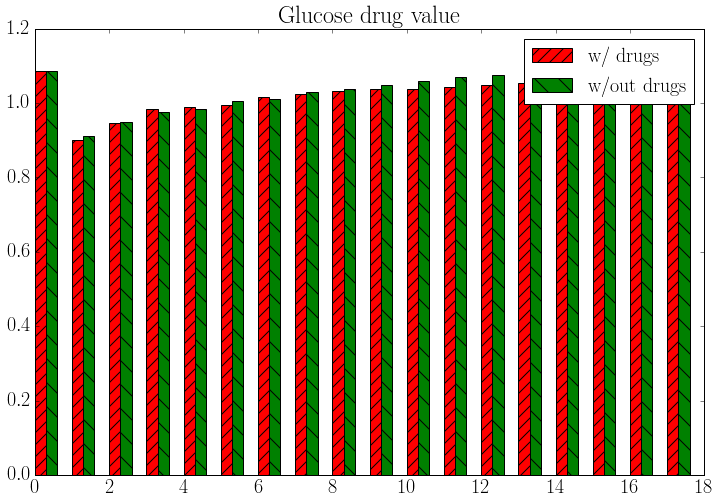

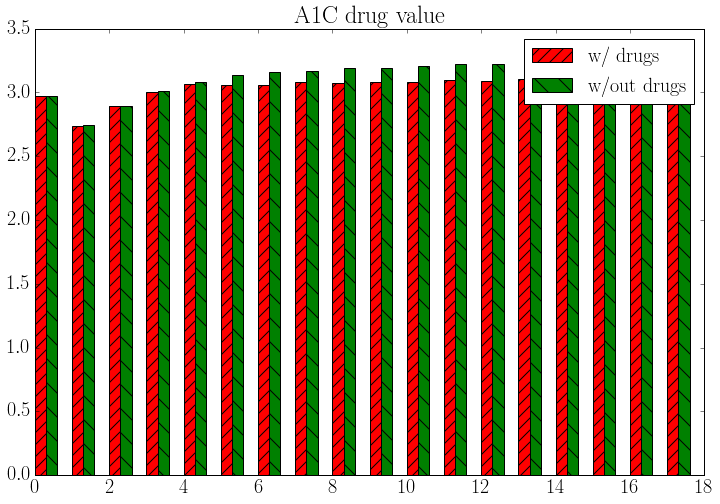

In [12]:
Nmax = 10
plt.figure(figsize=(12,8))
data = results['gluc_drug']/(results['gluc_drug_ctr']+1.)
plt.bar(np.arange(len(data)),data,width=0.3,color='r',hatch='//',label='w/ drugs')
data = results['gluc_nodrug']/(results['gluc_nodrug_ctr']+1.)
plt.bar(np.arange(len(data))+0.3,data,width=0.3,color='g',hatch='\\',label='w/out drugs')
plt.title('Glucose drug value')
plt.legend()

Nmax = 10
plt.figure(figsize=(12,8))
data = results['a1c_drug']/(results['a1c_drug_ctr']+1.)
plt.bar(np.arange(len(data)),data,width=0.3,color='r',hatch='//',label='w/ drugs')
data = results['a1c_nodrug']/(results['a1c_nodrug_ctr']+1.)
plt.bar(np.arange(len(data))+0.3,data,width=0.3,color='g',hatch='\\',label='w/out drugs')
plt.legend()
plt.title('A1C drug value')


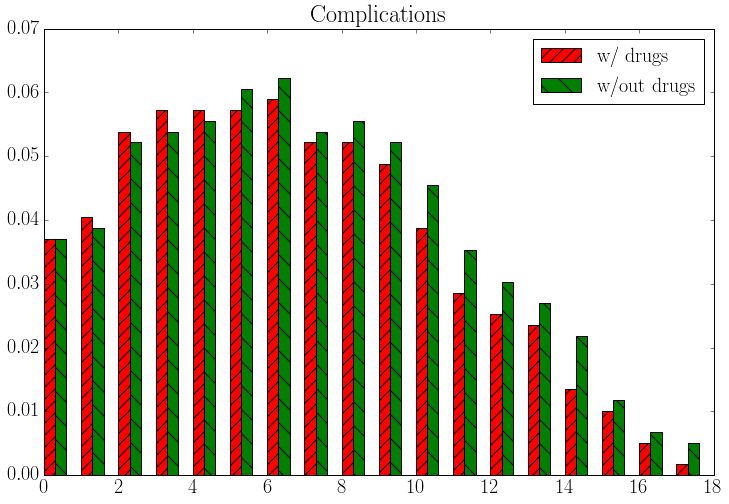

In [13]:
Nmax = 10
plt.figure(figsize=(12,8))
data = results['compl_drug']/(results['compl_drug_ctr']+1.)
plt.bar(np.arange(len(data)),data,width=0.3,color='r',hatch='//',label='w/ drugs')
data = results['compl_nodrug']/(results['compl_nodrug_ctr']+1.)
plt.bar(np.arange(len(data))+0.3,data,width=0.3,color='g',hatch='\\',label='w/out drugs')
plt.title('Complications')
plt.legend()

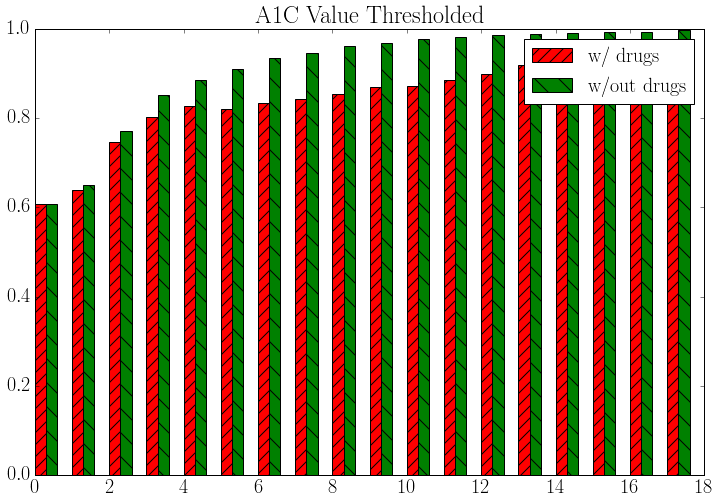

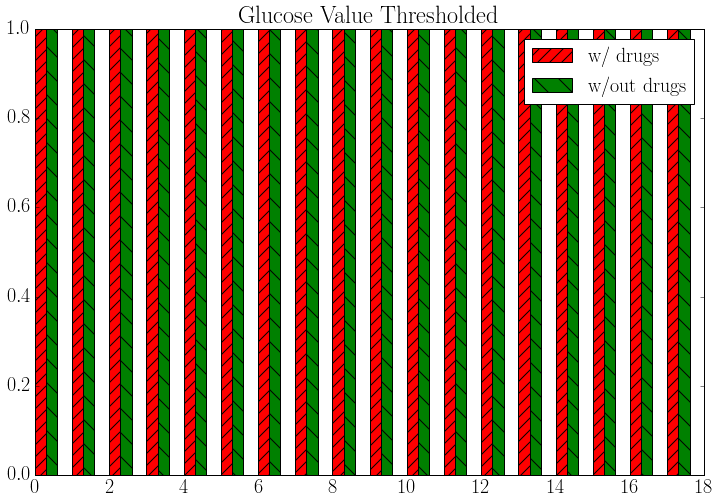

In [14]:
Nmax = 10
plt.figure(figsize=(12,8))
data = results['a1c_drug_thres']/(results['a1c_drug_thres_ctr']+1.)
plt.bar(np.arange(len(data)),data,width=0.3,color='r',hatch='//',label='w/ drugs')
data = results['a1c_nodrug_thres']/(results['a1c_nodrug_thres_ctr']+1.)
plt.bar(np.arange(len(data))+0.3,data,width=0.3,color='g',hatch='\\',label='w/out drugs')
plt.title('A1C Value Thresholded')
plt.legend()

Nmax = 10
plt.figure(figsize=(12,8))
data = results['gluc_drug_thres']/(results['gluc_drug_thres_ctr']+1.)
plt.bar(np.arange(len(data)),data,width=0.3,color='r',hatch='//',label='w/ drugs')
data = results['gluc_nodrug_thres']/(results['gluc_nodrug_thres_ctr']+1.)
plt.bar(np.arange(len(data))+0.3,data,width=0.3,color='g',hatch='\\',label='w/out drugs')
plt.title('Glucose Value Thresholded')
plt.legend()

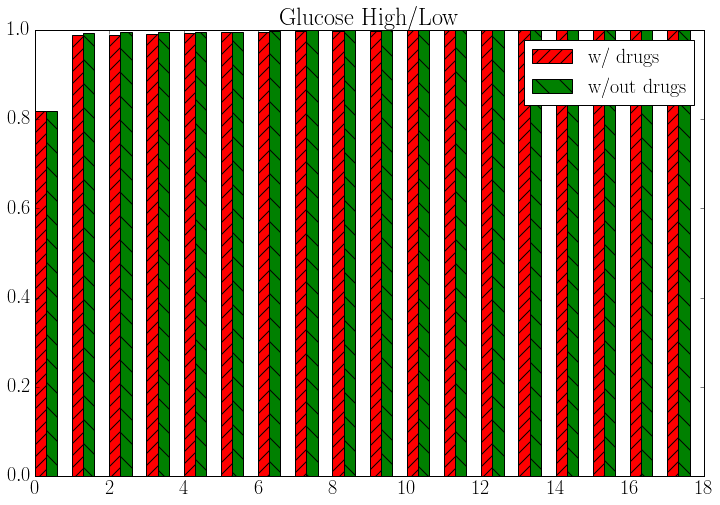

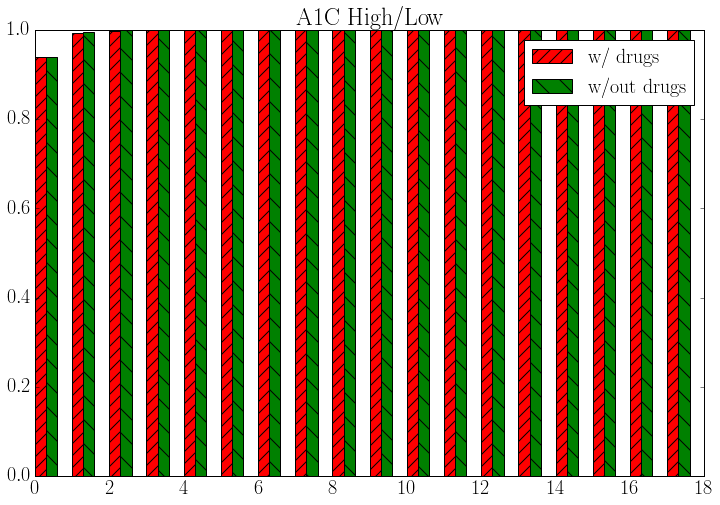

In [15]:
Nmax = 10
plt.figure(figsize=(12,8))
data = results['gluc_drug_hl']/(results['gluc_drug_hl_ctr']+1.)
plt.bar(np.arange(len(data)),data,width=0.3,color='r',hatch='//',label='w/ drugs')
data = results['gluc_nodrug_hl']/(results['gluc_nodrug_hl_ctr']+1.)
plt.bar(np.arange(len(data))+0.3,data,width=0.3,color='g',hatch='\\',label='w/out drugs')
plt.title('Glucose High/Low')
plt.legend()

Nmax = 10
plt.figure(figsize=(12,8))
data = results['a1c_drug_hl']/(results['a1c_drug_hl_ctr']+1.)
plt.bar(np.arange(len(data)),data,width=0.3,color='r',hatch='//',label='w/ drugs')
data = results['a1c_nodrug_hl']/(results['a1c_nodrug_hl_ctr']+1.)
plt.bar(np.arange(len(data))+0.3,data,width=0.3,color='g',hatch='\\',label='w/out drugs')
plt.title('A1C High/Low')
plt.legend()